# Исследование работы интернет-магазина "Стримчик"

## Описание и цель проекта
Для изучения представлены данные интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры, а именно:
 - исторические данные о продажах игр, 
 - оценки пользователей и экспертов, 
 - жанры и платформы (например, Xbox или PlayStation). 
 
Цель исследования - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

## Подготовка данных

### Загрузка данных и изучение общей информации

In [4]:
games = pd.read_csv('/datasets/games.csv') #чтение файла /datasets/games.csv
#pd.set_option('display.max_colums', None) #устанавливаем параметры, чтобы отображались все столбцы таблицы
display (games.head()) #вывод первых пяти строк
print (games.info()) #вывод общей информации о DataFrame

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


При изучении общей информации можем сразу отметить:
 - стобцы Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating имеют нулевые данные;
 - названия столбцов необходимо привести к общепринятому формату (заменив все буквы на строчные);
 - необходимо изменить типы данных для столбцов year_of_release (к int) и User_Score (к float)

### Замена названий столбцов
Приведем все названия столбцов к единому формату - запишем все названия в нижнем регистре

In [5]:
games.columns = games.columns.str.lower()

In [6]:
display (games.head()) #вывод первых пяти строк для проверки переименования столбцов
games.info() #вывод общей информации о DataFrame

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Преобразование типов данных
Преобразуем данные столбцов:
 - год выпуска (year_of_release) - в целое число (int);
 - оценка пользователей (user_score) - должно быть вещественным числом (при вызове метода info() после преобразования типа данных столбец user_score остался с типом object, так как есть нулевые значения, которые будут обработаны на одном из этапов работы).

In [7]:
games['year_of_release']=games['year_of_release'].astype('Int64')
games['user_score']=pd.to_numeric(games['user_score'], errors='ignore')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


### Проверка на наличие дубликатов
Явные дубликаты в таблице не зафиксированы (команда проверки представлена ниже).

In [8]:
print('Количество дубликатов:', games.duplicated().sum())

Количество дубликатов: 0


Выполним также проверку на наличие неявных дубликатов.

In [9]:
games[games[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Удалим выявленные дубликаты.

In [10]:
games=games.drop(games[games[['name', 'platform','year_of_release']].duplicated(keep='last')].index)
games[games[['name', 'platform','year_of_release']].duplicated(keep=False)] #еще раз проверяем, остались ли дубликаты

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### Обработка пропусков
Из информационной таблицы видим, что пропуски есть в столбцах name, year_of_release, genre, critic_score, user_score, rating.
Рассмотрим каждый их них.

In [11]:
games.isna().sum() #число пропусков

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

In [12]:
# тестирование кода, рекомендованного куратором
pd.DataFrame(round(games.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,40.100000


#### Пропуски в столбце name (название игры)
Цель нашего исследования - это выявить закономерности, определяющие успешность игры, а без названия игры выявить такие закономерности не представляется возможным.
Можно было бы заменить на "другие", но такое значение всего одно, можем удалить эту строку.

In [13]:
games=games.dropna(subset=['name'])
games.isna().sum() #число пропусков

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

При удалении этих двух строк также исключили пустые значения в столбце genre (жанр).

#### Пропуски в столбце year_of_release (год выпуска)
Подобрать "альтернативное" значение нельзя (нельзя заменить год выпуска, например, средним значением). При этом предлагается на данном этапе не удалять эти строки, так как их 269 (более 1,5%).

#### Пропуски в столбце critic_score (оценка критиков)
Обработка пропусков медианой или средним в данном случае невозможна, так как рейтинг игры напрямую может повлиять на продажи в следующем году. Или, например, игра только вышла и не имеет оценки.
Удалить более 8,5 тысяч строк мы тоже не можем, соответственно, осталяем пропуски без изменений.

In [14]:
#games['critic_score']=games['critic_score'].fillna(games['critic_score'].median())
games[games['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Также проверим столбец на наличие аномальных значений (по условиям задачи значение может быть не более 100).
Из информационной таблицы ниже видим, что аномальных значений не зафиксировано. Зафиксированы значения от 13 до 98.

In [15]:
games['critic_score'].describe()

count    8136.000000
mean       68.965954
std        13.938153
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

#### Пропуски в столбце user_score (оценка пользователей)
Обработка пропусков медианой или средним в данном случае невозможна, так как рейтинг игры напрямую может повлиять на продажи в следующем году. Или, например, игра только вышла и не имеет оценки.
Удалить более 6,5 тысяч строк мы тоже не можем, соответственно, осталяем пропуски без изменений.

In [16]:
print(games['user_score'].unique()) #выведем уникальные значения, помимо NaN в столбце есть значения tbd - 
                             #рейтинг еще не определен, заменим эти значения также на NaN
games['user_score'] = games['user_score'].replace ('tbd', np.nan)

#games['user_score']=games['user_score'].fillna(games['user_score'].median())
#games.isna().sum() #число пропусков
games[games['user_score'].isna()]

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Также проверим столбец на наличие аномальных значений (по условиям задачи знаяение может быть не более 10).
Из информационной таблицы ниже видим, что аномальных значений не зафиксировано. Зафиксированы значения от 0 до 9,7.

In [17]:
games['user_score']=pd.to_numeric(games['user_score'], errors='ignore') # повторим преобразование данных, 
                                                                        # так как теперь нет значения, которое не может быть преобразовано во float 
games['user_score'].describe()

count    7589.000000
mean        7.125260
std         1.499989
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

#### Пропуски в столбце rating (рейтинг от организации ESRB)

In [18]:
games['rating'].unique() #выведем уникальные значения столбца

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Значение 'K-A' необходимо заменить на 'E' (он использовался до 1998 года вместо 'E'), а пустые значения заполнить значением 'RP' - категория еще не определена).

In [19]:
games['rating']=games['rating'].replace('K-A', 'RP')
games['rating']=games['rating'].fillna('RP')
games.isna().sum() #число пропусков

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64

### Подсчет суммарных продаж во всех регионах

In [20]:
games['sales']=games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,RP,0.01


### Промежуточный вывод
На данном этапе исследования выполнены работы по подготовке данных:
 - загрузка данных и изучение общей информации;
 - замена названий столбцов;
 - преобразование типов данных;
 - проверка на наличие дубликатов;
 - обработка пропусков;
 - подсчет суммарных продаж во всех регионах.

В качестве причин появления пропусков можно предположить:
 - человеческий фактор (ошибки при вводе данных);
 - ошибки при чтении/копировании/форматировании файла;
 - отсутствие информации в принципе и др.

## Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

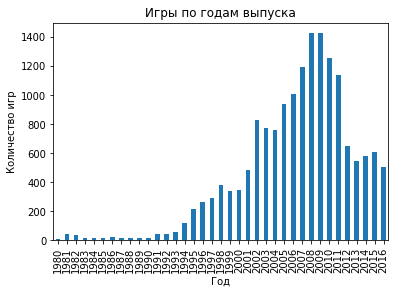

In [21]:
games.groupby('year_of_release')['year_of_release'].count().plot.bar(title='Игры по годам выпуска', xlabel='Год', ylabel='Количество игр')
games['year_of_release'].describe()

Из полученных данных видим, что основные значения "лежат" в интервале с 1994 года (Q1-1.5*std) по 2016 год (максимальное значение, так как Q3+1.5*std больше максимального).

### Посмотрим, как менялись продажи по платформам
Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 

platform
PS2     1255.77
X360     971.42
PS3      937.09
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: sales, dtype: float64


<AxesSubplot:title={'center':'Продажи по годам'}, xlabel='Год', ylabel='Продажи (млн копий)'>

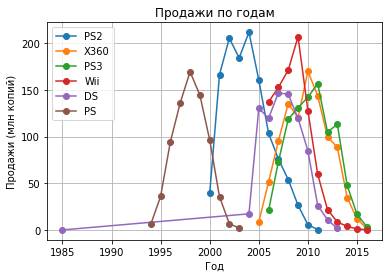

In [22]:
print(games.groupby('platform')['sales'].sum().sort_values(ascending=False).head(10)) #выводим топ-10
#построим графики для первых шести
games.query('platform == "PS2"').groupby('year_of_release')['sales'].sum().plot(x='year_of_release', y='sales', title='Продажи по годам', xlabel='Год', ylabel='Продажи (млн копий)', style='o-', grid=True, label='PS2', legend=True) #график продаж по годам по платформе PS2
games.query('platform == "X360"').groupby('year_of_release')['sales'].sum().plot(x='year_of_release', y='sales', title='Продажи по годам', xlabel='Год', ylabel='Продажи (млн копий)', style='o-', grid=True, label='X360', legend=True) #график продаж по годам по платформе X360
games.query('platform == "PS3"').groupby('year_of_release')['sales'].sum().plot(x='year_of_release', y='sales', title='Продажи по годам', xlabel='Год', ylabel='Продажи (млн копий)', style='o-', grid=True, label='PS3', legend=True) #график продаж по годам по платформе PS3
games.query('platform == "Wii"').groupby('year_of_release')['sales'].sum().plot(x='year_of_release', y='sales', title='Продажи по годам', xlabel='Год', ylabel='Продажи (млн копий)', style='o-', grid=True, label='Wii', legend=True) #график продаж по годам по платформе Wii
games.query('platform == "DS"').groupby('year_of_release')['sales'].sum().plot(x='year_of_release', y='sales', title='Продажи по годам', xlabel='Год', ylabel='Продажи (млн копий)', style='o-', grid=True, label='DS', legend=True) #график продаж по годам по платформе DS
games.query('platform == "PS"').groupby('year_of_release')['sales'].sum().plot(x='year_of_release', y='sales', title='Продажи по годам', xlabel='Год', ylabel='Продажи (млн копий)', style='o-', grid=True, label='PS', legend=True) #график продаж по годам по платформе PS


Обратим внимание на платформу DS - интервал в 20 лет смущает, платформы в 1985 году еще не существовало, выведем эту строку и проанализируем.

In [23]:
games.query('(platform=="DS")&(year_of_release==1985)')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,RP,0.02


Удалим эту строку и потроим графики повторно.

In [24]:
games=games.drop(labels = [15957],axis = 0)

platform
PS2     1255.77
X360     971.42
PS3      937.09
Wii      907.51
DS       806.10
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: sales, dtype: float64


<AxesSubplot:title={'center':'Продажи по годам'}, xlabel='Год', ylabel='Продажи (млн копий)'>

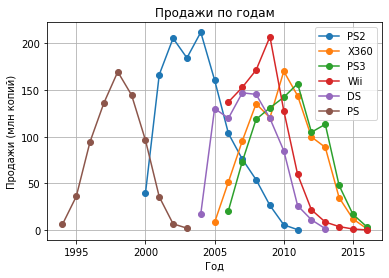

In [25]:
print(games.groupby('platform')['sales'].sum().sort_values(ascending=False).head(10)) #выводим топ-10
#построим графики для первых шести
games.query('platform == "PS2"').groupby('year_of_release')['sales'].sum().plot(x='year_of_release', y='sales', title='Продажи по годам', xlabel='Год', ylabel='Продажи (млн копий)', style='o-', grid=True, label='PS2', legend=True) #график продаж по годам по платформе PS2
games.query('platform == "X360"').groupby('year_of_release')['sales'].sum().plot(x='year_of_release', y='sales', title='Продажи по годам', xlabel='Год', ylabel='Продажи (млн копий)', style='o-', grid=True, label='X360', legend=True) #график продаж по годам по платформе X360
games.query('platform == "PS3"').groupby('year_of_release')['sales'].sum().plot(x='year_of_release', y='sales', title='Продажи по годам', xlabel='Год', ylabel='Продажи (млн копий)', style='o-', grid=True, label='PS3', legend=True) #график продаж по годам по платформе PS3
games.query('platform == "Wii"').groupby('year_of_release')['sales'].sum().plot(x='year_of_release', y='sales', title='Продажи по годам', xlabel='Год', ylabel='Продажи (млн копий)', style='o-', grid=True, label='Wii', legend=True) #график продаж по годам по платформе Wii
games.query('platform == "DS"').groupby('year_of_release')['sales'].sum().plot(x='year_of_release', y='sales', title='Продажи по годам', xlabel='Год', ylabel='Продажи (млн копий)', style='o-', grid=True, label='DS', legend=True) #график продаж по годам по платформе DS
games.query('platform == "PS"').groupby('year_of_release')['sales'].sum().plot(x='year_of_release', y='sales', title='Продажи по годам', xlabel='Год', ylabel='Продажи (млн копий)', style='o-', grid=True, label='PS', legend=True) #график продаж по годам по платформе PS

Из графиков можно сделать вывод, что "жизненный цикл" платформы составляет примерно 10 лет.
В исследовании предлагается взять данные за последние 5 лет.

In [26]:
games_new=games.query('year_of_release > 2011').reset_index() # создадим таблицу с данными за последние 5 лет
display(games_new)
games_new.info()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
3,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,RP,14.60
4,34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2880,16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
2881,16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
2882,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
2883,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2885 entries, 0 to 2884
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            2885 non-null   int64  
 1   name             2885 non-null   object 
 2   platform         2885 non-null   object 
 3   year_of_release  2885 non-null   Int64  
 4   genre            2885 non-null   object 
 5   na_sales         2885 non-null   float64
 6   eu_sales         2885 non-null   float64
 7   jp_sales         2885 non-null   float64
 8   other_sales      2885 non-null   float64
 9   critic_score     1311 non-null   float64
 10  user_score       1530 non-null   float64
 11  rating           2885 non-null   object 
 12  sales            2885 non-null   float64
dtypes: Int64(1), float64(7), int64(1), object(4)
memory usage: 296.0+ KB


Проведем исследование по продажам по новым данным.
Посчитаем суммарные продажи с разбивкой по платформам и построим графики с разбивкой по годам.

In [27]:
print(games_new.groupby('platform')['sales'].sum().sort_values(ascending=False))


platform
PS4     314.14
PS3     286.23
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: sales, dtype: float64


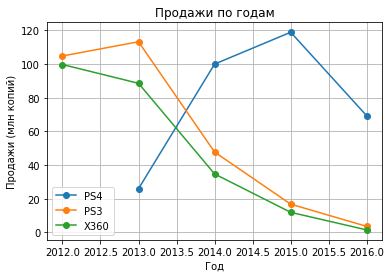

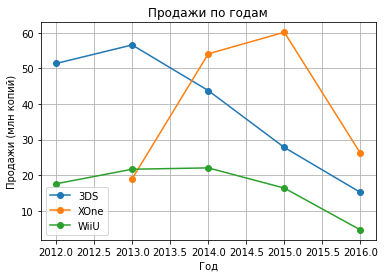

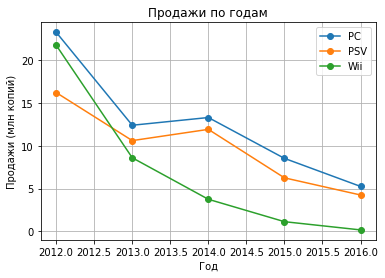

<AxesSubplot:title={'center':'Продажи по годам'}, xlabel='Год', ylabel='Продажи (млн копий)'>

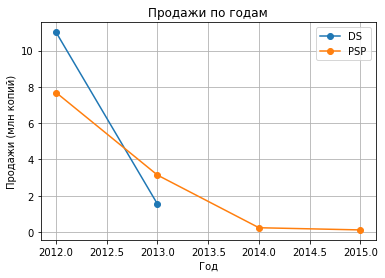

In [28]:
#построим графики, для лучшей читаемости будем выводить по три графика в одной системе координат
games_new.query('platform == "PS4"').groupby('year_of_release')['sales'].sum().plot(x='year_of_release', y='sales', title='Продажи по годам', xlabel='Год', ylabel='Продажи (млн копий)', style='o-', grid=True, label='PS4', legend=True) #график продаж по годам по платформе PS4
games_new.query('platform == "PS3"').groupby('year_of_release')['sales'].sum().plot(x='year_of_release', y='sales', title='Продажи по годам', xlabel='Год', ylabel='Продажи (млн копий)', style='o-', grid=True, label='PS3', legend=True) #график продаж по годам по платформе PS3
games_new.query('platform == "X360"').groupby('year_of_release')['sales'].sum().plot(x='year_of_release', y='sales', title='Продажи по годам', xlabel='Год', ylabel='Продажи (млн копий)', style='o-', grid=True, label='X360', legend=True) #график продаж по годам по платформе X360
plt.show()
games_new.query('platform == "3DS"').groupby('year_of_release')['sales'].sum().plot(x='year_of_release', y='sales', title='Продажи по годам', xlabel='Год', ylabel='Продажи (млн копий)', style='o-', grid=True, label='3DS', legend=True) #график продаж по годам по платформе 3DS
games_new.query('platform == "XOne"').groupby('year_of_release')['sales'].sum().plot(x='year_of_release', y='sales', title='Продажи по годам', xlabel='Год', ylabel='Продажи (млн копий)', style='o-', grid=True, label='XOne', legend=True) #график продаж по годам по платформе XOne
games_new.query('platform == "WiiU"').groupby('year_of_release')['sales'].sum().plot(x='year_of_release', y='sales', title='Продажи по годам', xlabel='Год', ylabel='Продажи (млн копий)', style='o-', grid=True, label='WiiU', legend=True) #график продаж по годам по платформе WiiU
plt.show()
games_new.query('platform == "PC"').groupby('year_of_release')['sales'].sum().plot(x='year_of_release', y='sales', title='Продажи по годам', xlabel='Год', ylabel='Продажи (млн копий)', style='o-', grid=True, label='PC', legend=True) #график продаж по годам по платформе PC
games_new.query('platform == "PSV"').groupby('year_of_release')['sales'].sum().plot(x='year_of_release', y='sales', title='Продажи по годам', xlabel='Год', ylabel='Продажи (млн копий)', style='o-', grid=True, label='PSV', legend=True) #график продаж по годам по платформе PSV
games_new.query('platform == "Wii"').groupby('year_of_release')['sales'].sum().plot(x='year_of_release', y='sales', title='Продажи по годам', xlabel='Год', ylabel='Продажи (млн копий)', style='o-', grid=True, label='Wii', legend=True) #график продаж по годам по платформе Wii
plt.show()
games_new.query('platform == "DS"').groupby('year_of_release')['sales'].sum().plot(x='year_of_release', y='sales', title='Продажи по годам', xlabel='Год', ylabel='Продажи (млн копий)', style='o-', grid=True, label='DS', legend=True) #график продаж по годам по платформе DS
games_new.query('platform == "PSP"').groupby('year_of_release')['sales'].sum().plot(x='year_of_release', y='sales', title='Продажи по годам', xlabel='Год', ylabel='Продажи (млн копий)', style='o-', grid=True, label='PSP', legend=True) #график продаж по годам по платформе PSP


Из полученных данных видим, что:
 - практически у всех платформ продажи идут на спад;
 - потенциально прибыльными платформами можно считать - PS4, XOne, 3DS (в 2016 году более 10 млн копий).

Построим график «ящик с усами» по продажам игр в разбивке по платформам.

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.0400,0.110,0.3125,14.60
DS,31.0,0.404839,1.439245,0.01,0.0200,0.050,0.1850,8.06
PC,250.0,0.250600,0.494640,0.01,0.0300,0.080,0.2400,5.14
PS3,492.0,0.581768,1.461626,0.01,0.0500,0.195,0.6100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSP,173.0,0.064682,0.071296,0.01,0.0200,0.030,0.0900,0.36
PSV,411.0,0.119659,0.203011,0.01,0.0200,0.050,0.1200,1.96
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.180,0.6875,6.76
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.220,0.5250,7.09


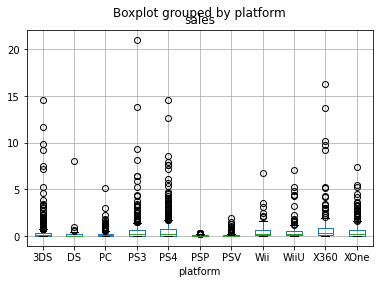

In [29]:
#games_new.pivot_table(index='platform', values='sales', aggfunc='sum').boxplot() 
#games_new.pivot_table(index='platform', values='sales', aggfunc='sum').describe() 
games_new.boxplot(column = 'sales', by = 'platform') 
games_new.groupby('platform')['sales'].describe()

Посчитаем также нормальные значения. 
Плюс построим этот же график, указав параметр ylim для более наглядного представления данных (для этих же целей выводим таблицу методом describe()).

,count,mean,std,min,25%,50%,75%,max,norm_min,norm_max
platform,,,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.0400,0.110,0.3125,14.60,-2.040742,2.393242
DS,31.0,0.404839,1.439245,0.01,0.0200,0.050,0.1850,8.06,-2.138867,2.343867
PC,250.0,0.250600,0.494640,0.01,0.0300,0.080,0.2400,5.14,-0.711961,0.981961
PS3,492.0,0.581768,1.461626,0.01,0.0500,0.195,0.6100,21.05,-2.142439,2.802439
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63,-2.354184,3.144184
PSP,173.0,0.064682,0.071296,0.01,0.0200,0.030,0.0900,0.36,-0.086945,0.196945
PSV,411.0,0.119659,0.203011,0.01,0.0200,0.050,0.1200,1.96,-0.284517,0.424517
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.180,0.6875,6.76,-1.685671,2.435671
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.220,0.5250,7.09,-1.508253,2.113253


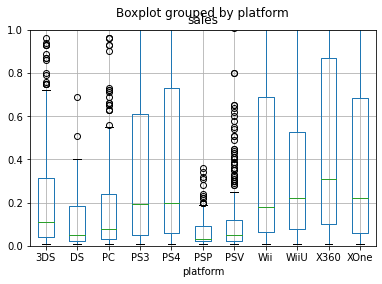

In [30]:
games_new.boxplot(column = 'sales', by = 'platform')
plt.ylim(0, 1) 

info_platform=games_new.groupby('platform')['sales'].describe()
info_platform['norm_min']=info_platform['25%']-1.5*info_platform['std']
info_platform['norm_max']=info_platform['75%']+1.5*info_platform['std']
info_platform

На основании полученных данных можно зафиксировать следующее:
 - медианное значение по продажам по платформам варьируется от 30 до 310 тысяч копий;
 - нормальные значения располагаются в промежутке от 0.01 (значения совпадают с минимальным значением, так как Q1-1.5*std выходит за границу минимального значения) до 3.438 млн копий.

### Посмотрим, как влияют на продажи внутри одной популярной платформы (PS4) отзывы пользователей и критиков
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами (при построении учтем результаты предыдущего пункта исследования, а именно отсеим "выбросы").

Коэффициент корреляции зависимости продаж от отзывов критиков: 0.406567902061781
Коэффициент корреляции зависимости продаж от отзывов пользователей: -0.031957110204556376


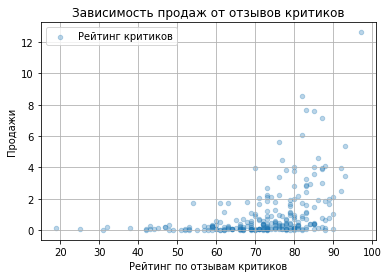

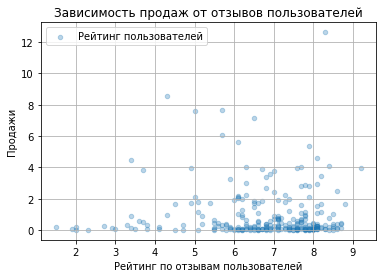

In [31]:
platform=games_new.query('platform == "PS4"')
platform.plot(kind='scatter', alpha=0.3, x='critic_score', y='sales', title='Зависимость продаж от отзывов критиков', xlabel='Рейтинг по отзывам критиков', ylabel='Продажи', style='o-', grid=True, label='Рейтинг критиков') #график зависимости продаж от рейтинга на основе отзывов критиков
print('Коэффициент корреляции зависимости продаж от отзывов критиков:', platform['sales'].corr(platform['critic_score']))
platform.plot(kind='scatter', alpha=0.3, x='user_score', y='sales', title='Зависимость продаж от отзывов пользователей', xlabel='Рейтинг по отзывам пользователей', ylabel='Продажи', style='o-', grid=True, label='Рейтинг пользователей', legend=True) #график зависимости продаж от рейтинга на основе отзывов пользователей
print('Коэффициент корреляции зависимости продаж от отзывов пользователей:', platform['sales'].corr(platform['user_score']))


На основании полученных данных можем сделать вывод, что есть очень слабая прямая зависимость продаж от отзывов критиков, при этом связь продаж с отзывами пользователей практически отсутствует.
Проверим это еще на четырех платформах.

Коэффициент корреляции зависимости продаж от отзывов критиков: 0.32940327363994226
Коэффициент корреляции зависимости продаж от отзывов пользователей: -0.0030994033825976364


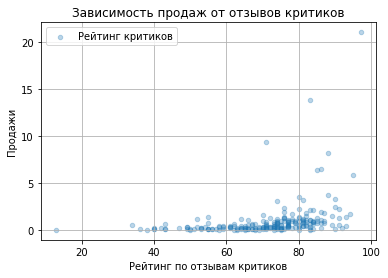

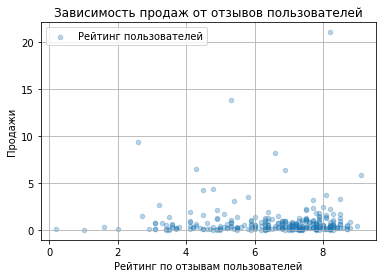

In [32]:
platform=games_new.query('platform == "PS3"')
platform.plot(kind='scatter', alpha=0.3, x='critic_score', y='sales', title='Зависимость продаж от отзывов критиков', xlabel='Рейтинг по отзывам критиков', ylabel='Продажи', style='o-', grid=True, label='Рейтинг критиков') #график зависимости продаж от рейтинга на основе отзывов критиков
print('Коэффициент корреляции зависимости продаж от отзывов критиков:', platform['sales'].corr(platform['critic_score']))
platform.plot(kind='scatter', alpha=0.3, x='user_score', y='sales', title='Зависимость продаж от отзывов пользователей', xlabel='Рейтинг по отзывам пользователей', ylabel='Продажи', style='o-', grid=True, label='Рейтинг пользователей', legend=True) #график зависимости продаж от рейтинга на основе отзывов пользователей
print('Коэффициент корреляции зависимости продаж от отзывов пользователей:', platform['sales'].corr(platform['user_score']))


Коэффициент корреляции зависимости продаж от отзывов критиков: 0.36057348885073365
Коэффициент корреляции зависимости продаж от отзывов пользователей: 0.0061639786462133256


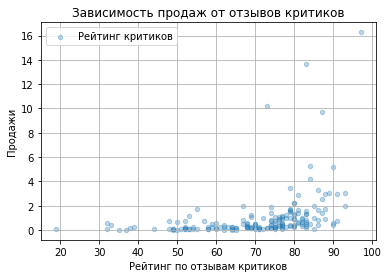

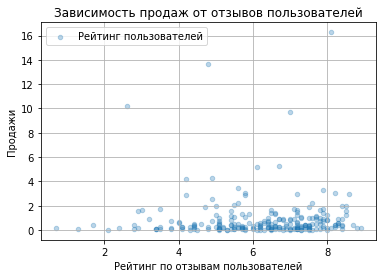

In [33]:
platform=games_new.query('platform == "X360"')
platform.plot(kind='scatter', alpha=0.3, x='critic_score', y='sales', title='Зависимость продаж от отзывов критиков', xlabel='Рейтинг по отзывам критиков', ylabel='Продажи', style='o-', grid=True, label='Рейтинг критиков') #график зависимости продаж от рейтинга на основе отзывов критиков
print('Коэффициент корреляции зависимости продаж от отзывов критиков:', platform['sales'].corr(platform['critic_score']))
platform.plot(kind='scatter', alpha=0.3, x='user_score', y='sales', title='Зависимость продаж от отзывов пользователей', xlabel='Рейтинг по отзывам пользователей', ylabel='Продажи', style='o-', grid=True, label='Рейтинг пользователей', legend=True) #график зависимости продаж от рейтинга на основе отзывов пользователей
print('Коэффициент корреляции зависимости продаж от отзывов пользователей:', platform['sales'].corr(platform['user_score']))


Коэффициент корреляции зависимости продаж от отзывов критиков: 0.32080286953607845
Коэффициент корреляции зависимости продаж от отзывов пользователей: 0.19758263411038596


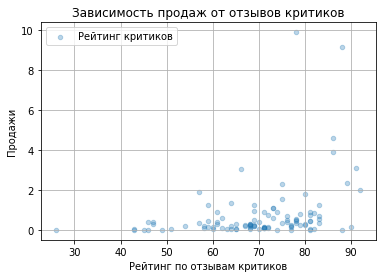

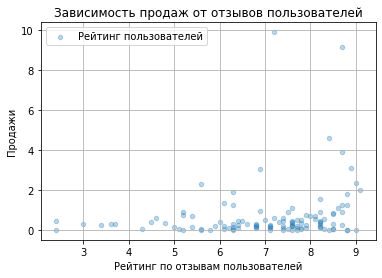

In [34]:
platform=games_new.query('platform == "3DS"')
platform.plot(kind='scatter', alpha=0.3, x='critic_score', y='sales', title='Зависимость продаж от отзывов критиков', xlabel='Рейтинг по отзывам критиков', ylabel='Продажи', style='o-', grid=True, label='Рейтинг критиков') #график зависимости продаж от рейтинга на основе отзывов критиков
print('Коэффициент корреляции зависимости продаж от отзывов критиков:', platform['sales'].corr(platform['critic_score']))
platform.plot(kind='scatter', alpha=0.3, x='user_score', y='sales', title='Зависимость продаж от отзывов пользователей', xlabel='Рейтинг по отзывам пользователей', ylabel='Продажи', style='o-', grid=True, label='Рейтинг пользователей', legend=True) #график зависимости продаж от рейтинга на основе отзывов пользователей
print('Коэффициент корреляции зависимости продаж от отзывов пользователей:', platform['sales'].corr(platform['user_score']))


Коэффициент корреляции зависимости продаж от отзывов критиков: 0.41699832800840175
Коэффициент корреляции зависимости продаж от отзывов пользователей: -0.06892505328279412


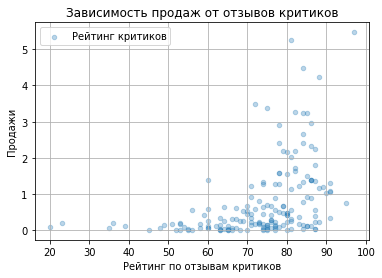

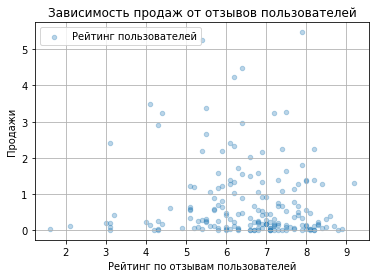

In [35]:
platform=games_new.query('platform == "XOne"')
platform.plot(kind='scatter', alpha=0.3, x='critic_score', y='sales', title='Зависимость продаж от отзывов критиков', xlabel='Рейтинг по отзывам критиков', ylabel='Продажи', style='o-', grid=True, label='Рейтинг критиков') #график зависимости продаж от рейтинга на основе отзывов критиков
print('Коэффициент корреляции зависимости продаж от отзывов критиков:', platform['sales'].corr(platform['critic_score']))
platform.plot(kind='scatter', alpha=0.3, x='user_score', y='sales', title='Зависимость продаж от отзывов пользователей', xlabel='Рейтинг по отзывам пользователей', ylabel='Продажи', style='o-', grid=True, label='Рейтинг пользователей', legend=True) #график зависимости продаж от рейтинга на основе отзывов пользователей
print('Коэффициент корреляции зависимости продаж от отзывов пользователей:', platform['sales'].corr(platform['user_score']))


Графики подтверждают вывод, сделанный выше.

### Посмотрим на общее распределение игр по жанрам

<AxesSubplot:title={'center':'Жанры'}, xlabel='жанр', ylabel='количество игр'>

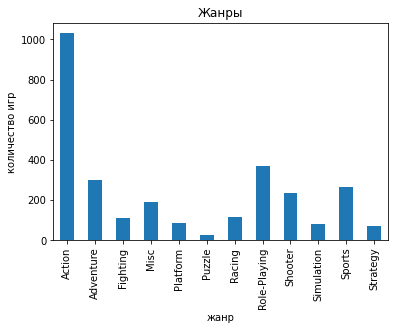

In [36]:
games_new.groupby('genre')['genre'].count().plot.bar(title='Жанры', xlabel='жанр', ylabel='количество игр')

Найдем жанр, где игры стабильно приносят высокий доход - для этого рассмотрим медианные продажи. Лучше всего нам это покажет boxplot.

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Adventure,302.0,0.097450,0.208237,0.01,0.020,0.030,0.0775,1.66
Puzzle,28.0,0.174643,0.305438,0.01,0.020,0.045,0.1025,1.19
Strategy,71.0,0.187887,0.271976,0.01,0.030,0.080,0.2500,1.67
Action,1031.0,0.427856,1.166504,0.01,0.030,0.120,0.3900,21.05
Misc,192.0,0.442917,1.081047,0.01,0.030,0.120,0.3375,9.18
Simulation,80.0,0.439000,1.244500,0.01,0.030,0.120,0.3275,9.17
Fighting,109.0,0.408165,0.910385,0.01,0.060,0.130,0.3600,7.55
Racing,115.0,0.465217,0.888664,0.01,0.050,0.140,0.4200,7.09
Role-Playing,370.0,0.521081,1.315937,0.01,0.060,0.140,0.4075,14.60


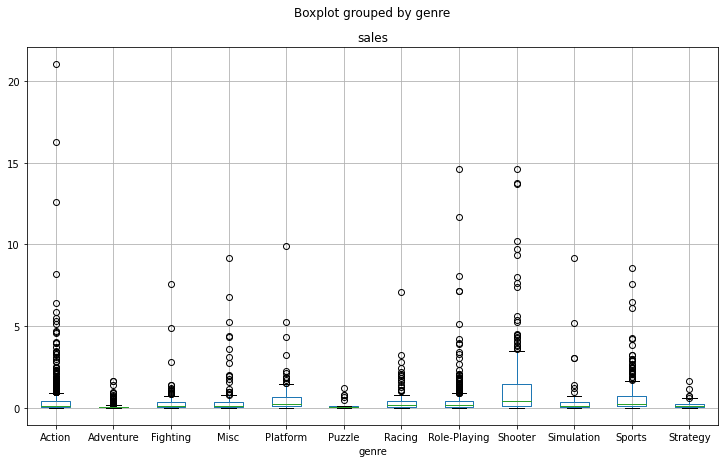

In [37]:
#games_new.groupby('genre')['sales'].sum().plot.bar(title='Прибыльность по жанрам', xlabel='жанр', ylabel='продажи')
games_new.boxplot(column = 'sales', by = 'genre', figsize=(12,7))
games_new.groupby('genre')['sales'].describe().sort_values(by='50%')


В лидерах по продажам жанр Shooter, при этом Puzzle и Adventure наименее популярны.

Для наглядной визуализации добавим параметр ylim при отображении данных.

(0.0, 1.5)

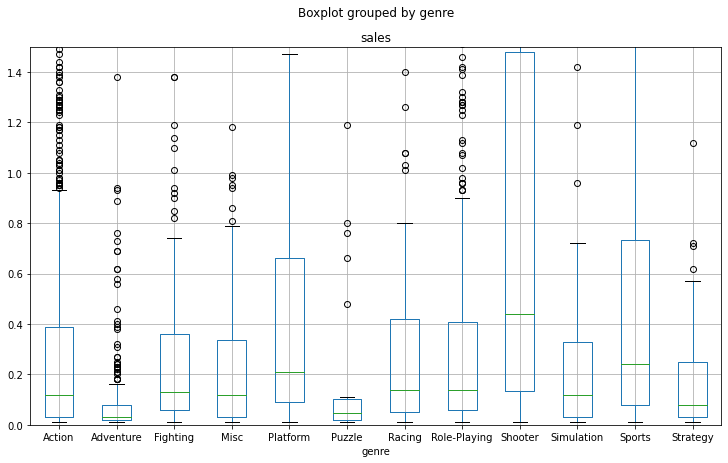

In [38]:
games_new.boxplot(column = 'sales', by = 'genre', figsize=(12,7))
plt.ylim(0,1.5)

### Промежуточный вывод
На данном этапе работ проведен исследовательский анализ данных.
Из полученных данных видим, что основные продажи "лежат" в интервале с 1994 года по 2016 год, а также что "жизненный цикл" платформы составляет примерно 10 лет. В исследовании предлагается взять данные за последние 5 лет.
Из полученных данных также видим, что:
 - практически у всех платформ продажи идут на спад;
 - потенциально прибыльными платформами можно считать - PS4, XOne, 3DS.
 - медианное значение по продажам по платформам варьируется от 30 до 310 тысяч копий;
 - нормальные значения располагаются в промежутке от 0.01 (значения совпадают с минимальным значением, так как Q1-1.5*std выходит за границу минимального значения) до 3.438 млн копий.
 - в рамках одной платформы есть очень слабая прямая зависимость продаж от отзывов критиков, при этом связь продаж с отзывами пользователей практически отсутствует;
 - что касается жанров, в лидерах по продажам жанр Shooter, при этом Puzzle и Adventure наименее популярны.

## Составим портрет пользователя каждого региона (NA, EU, JP)

### Самые популярные платформы (топ-5)

platform
X360    140.05
PS4     108.74
PS3     101.27
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64


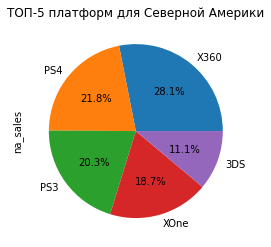

platform
PS4     141.09
PS3     106.64
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64


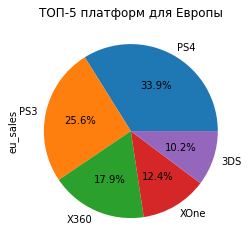

platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64

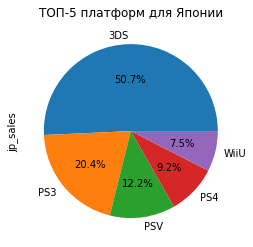

In [39]:
games_new.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5).plot.pie(title='ТОП-5 платформ для Северной Америки', autopct='%1.1f%%')
print(games_new.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5))
plt.show()
games_new.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5).plot.pie(title='ТОП-5 платформ для Европы', autopct='%1.1f%%')
print(games_new.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5))
plt.show()
games_new.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5).plot.pie(title='ТОП-5 платформ для Японии', autopct='%1.1f%%')
games_new.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)


Из полученных данных можно сделать вывод, что пользователи из Северной Америки и Европы отдают предпочтение платформам X360, PS4, PS3, XOne, 3DS, а в Японии популярностью пользуются 3DS, PS3, PSV, PS4, WiiU (стоить отметить "патриотизм" японцев - все представленные в ТОП-5 платформы производства Японии).

### Самые популярные жанры (топ-5)

genre
Action          177.84
Shooter         144.77
Sports           79.42
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64


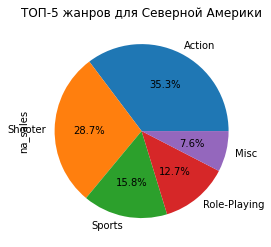

genre
Action          159.34
Shooter         113.47
Sports           68.87
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64


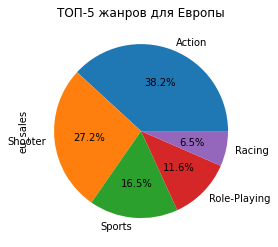

genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64

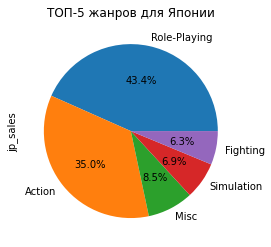

In [40]:
games_new.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5).plot.pie(title='ТОП-5 жанров для Северной Америки', autopct='%1.1f%%')
print(games_new.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5))
plt.show()
games_new.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5).plot.pie(title='ТОП-5 жанров для Европы', autopct='%1.1f%%')
print(games_new.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5))
plt.show()
games_new.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5).plot.pie(title='ТОП-5 жанров для Японии', autopct='%1.1f%%')
games_new.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)


Здесь также наблюдается "схожесть" пользователя из Северной Америки и Европы - он выбирает жанры Action, Shooter. Пользователь из Японии предпочитает Role-Playing.

### Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе

rating
M       231.57
E       112.26
RP      103.31
E10+     75.70
T        66.02
Name: na_sales, dtype: float64


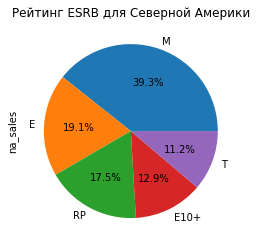

rating
M       193.96
E       112.81
RP       91.50
E10+     55.37
T        52.96
Name: eu_sales, dtype: float64


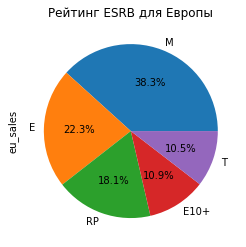

rating
RP      108.84
E        28.33
T        26.02
M        21.20
E10+      8.19
Name: jp_sales, dtype: float64

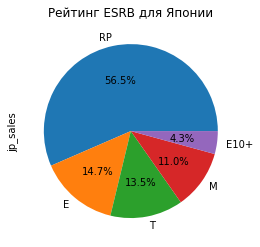

In [41]:
games_new.groupby('rating')['na_sales'].sum().sort_values(ascending=False).plot.pie(title='Рейтинг ESRB для Северной Америки', autopct='%1.1f%%')
print(games_new.groupby('rating')['na_sales'].sum().sort_values(ascending=False))
plt.show()
games_new.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).plot.pie(title='Рейтинг ESRB для Европы', autopct='%1.1f%%')
print(games_new.groupby('rating')['eu_sales'].sum().sort_values(ascending=False))
plt.show()
games_new.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).plot.pie(title='Рейтинг ESRB для Японии', autopct='%1.1f%%')
games_new.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)


В Северной Америке и Европе предпочитают игры категории Е (для всех возрастных категорий) и М (для лиц старше 17 лет), при этом в Японии очень много игр без определенной категории (RP). Это, вероятно, связано с тем, что система ESRB применима в Америке, Мексике и Канаде, сведения японской рейтинговой системы CERO для анализа не представлены.

### Промежуточный вывод
При изучении данных о предпочтения пользователей получены следующие результаты:
 - пользователи из Северной Америки и Европы отдают предпочтение платформам X360, PS4, PS3, XOne, 3DS, а в Японии популярностью пользуются 3DS, PS3, PSV, PS4, WiiU (стоить отметить "патриотизм" японцев - все представленные в ТОП-5 платформы производства Японии).;
 - в части жанров пользователь из Северной Америки и Европы выбирает Action, Shooter, пользователь из Японии предпочитает Role-Playing;
 - в Северной Америке и Европе предпочитают игры категории Е (для всех возрастных категорий) и М (для лиц старше 17 лет), при этом в Японии очень много игр без определенной категории (RP). Это, вероятно, связано с тем, что система ESRB применима в Америке, Мексике и Канаде, сведения японской рейтинговой системы CERO для анализа не представлены.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC не равны.


In [42]:
user_score_xbox = games_new.query('platform=="XOne"')
user_score_xbox=user_score_xbox.dropna(subset=['user_score'])

user_score_pc = games_new.query('platform=="PC"')
user_score_pc=user_score_pc.dropna(subset=['user_score'])

alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(user_score_xbox['user_score'], user_score_pc['user_score'], alternative='two-sided')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны.

Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.

In [43]:
genre_action = games_new.query('genre=="Action"')
genre_action=genre_action.dropna(subset=['user_score'])

genre_sports = games_new.query('genre=="Sports"')
genre_sports=genre_sports.dropna(subset=['user_score'])

alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(genre_action['user_score'], genre_sports['user_score'], alternative='two-sided')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 4.8045233804629176e-26
Отвергаем нулевую гипотезу


### Промежуточный вывод

В данном разделе проверены и подтверждены следующие гипотезы:
 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


## Общий вывод

В данном проекте изучены данные интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры, а именно:
 - исторические данные о продажах игр, 
 - оценки пользователей и экспертов, 
 - жанры и платформы (например, Xbox или PlayStation). 
 
Цель исследования - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

На первом этапе были выполнены работы по подготовке данных:
 - загрузка данных и изучение общей информации;
 - змена названий столбцов;
 - преобразование типов данных;
 - проверка на наличие дубликатов;
 - обработка пропусков;
 - подсчет суммарных продаж во всех регионах.

В качестве причин появления пропусков можно предположить:
 - человеческий фактор (ошибки при вводе данных);
 - ошибки при чтении/копировании/форматировании файла;
 - отсутствие информации в принципе и др.

В рамках исследовательского анализа данных сделаны следующие выводы:
 - основные продажи "лежат" в интервале с 1994 года по 2016 год;
 - "жизненный цикл" платформы составляет примерно 10 лет (в исследовании проанализированы данные за последние 5 лет);
 - практически у всех платформ продажи идут на спад;
 - потенциально прибыльными платформами можно считать - PS4, XOne, 3DS.
 - медианное значение по продажам по платформам варьируется от 30 до 310 тысяч копий;
 - нормальные значения располагаются в промежутке от 0.01 (значения совпадают с минимальным значением, так как Q1-1.5*std выходит за границу минимального значения) до 3.438 млн копий.
 - в рамках одной платформы есть очень слабая прямая зависимость продаж от отзывов критиков, при этом связь продаж с отзывами пользователей практически отсутствует;
 - что касается жанров, в лидерах по продажам жанр Shooter, при этом Puzzle и Adventure наименее популярны.

При изучении данных о предпочтения пользователей получены следующие результаты:
 - пользователи из Северной Америки и Европы отдают предпочтение платформам X360, PS4, PS3, XOne, 3DS, а в Японии популярностью пользуются 3DS, PS3, PSV, PS4, WiiU (стоить отметить "патриотизм" японцев - все представленные в ТОП-5 платформы производства Японии).;
 - в части жанров пользователь из Северной Америки и Европы выбирает Action, Shooter, пользователь из Японии предпочитает Role-Playing;
 - в Северной Америке и Европе предпочитают игры категории Е (для всех возрастных категорий) и М (для лиц старше 17 лет), при этом в Японии очень много игр без определенной категории (RP). Это, вероятно, связано с тем, что система ESRB применима в Америке, Мексике и Канаде, сведения японской рейтинговой системы CERO для анализа не представлены.
 
На основании проведенного исследования проверены и подтверждены следующие гипотезы:
 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.